In [1]:
# importing the zipfile module 
# from zipfile import ZipFile 
  
# # loading the temp.zip and creating a zip object 
# with ZipFile("dataset/playground-series-s4e10.zip", 'r') as zObject: 
  
#     # Extracting all the members of the zip  
#     # into a specific location. 
#     zObject.extractall( 
#         path="dataset") 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings('ignore')
print("Setup Completed!")

Setup Completed!


#### Read train & test datasets

In [2]:
train_dataset = pd.read_csv("dataset/train.csv", index_col='id')
test_dataset = pd.read_csv("dataset/test.csv", index_col='id')

# Exploratory Data Analysis (EDA)

#### Step-1: Data Understanding
*   DataFrame shape
*   Head and Tail


*   dtypes
*   describe


In [3]:
train_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
train_dataset.shape

(58645, 12)

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


In [6]:
train_dataset.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


#### ### Step-2: Data Preparation


*   Check missing values
*   Check duplicates

In [7]:
train_dataset.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

##### There is no missing values

In [8]:
train_dataset.duplicated().sum()

0

##### No duplicates

In [9]:
test_dataset.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [10]:
test_dataset.duplicated().sum()

0

### Step-3: Feature Understanding

### Plotting feature distribution
*   Histogram
*   KDE


*   BoxPlot



In [11]:
train_dataset.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

<AxesSubplot:xlabel='id'>

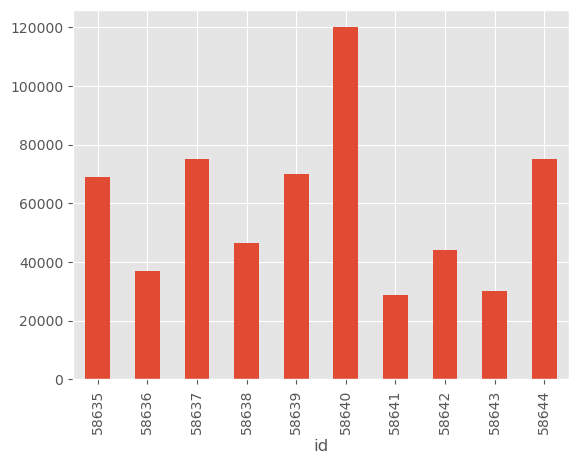

In [12]:
train_dataset['person_income'].tail(10).plot(kind='bar')

<AxesSubplot:xlabel='id'>

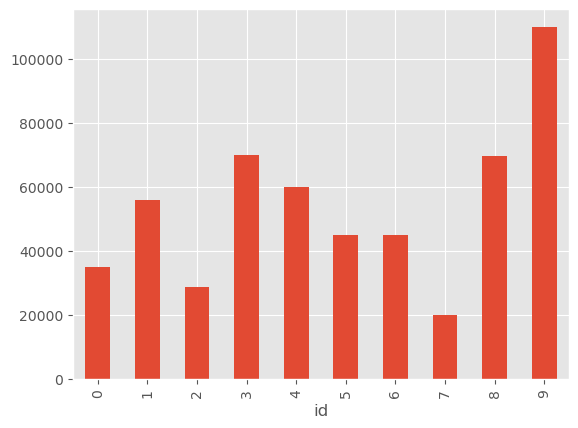

In [13]:
train_dataset['person_income'].head(10).plot(kind='bar')

<AxesSubplot:xlabel='id'>

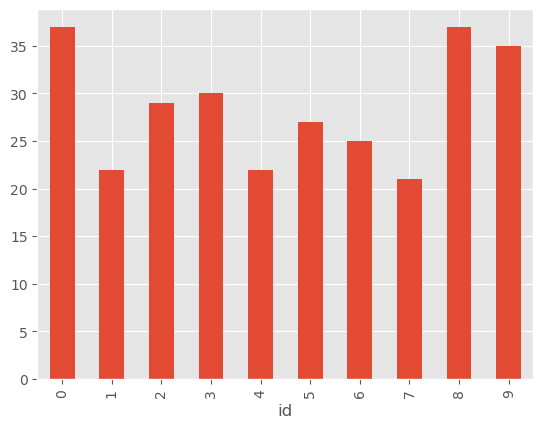

In [14]:
train_dataset['person_age'].head(10).plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

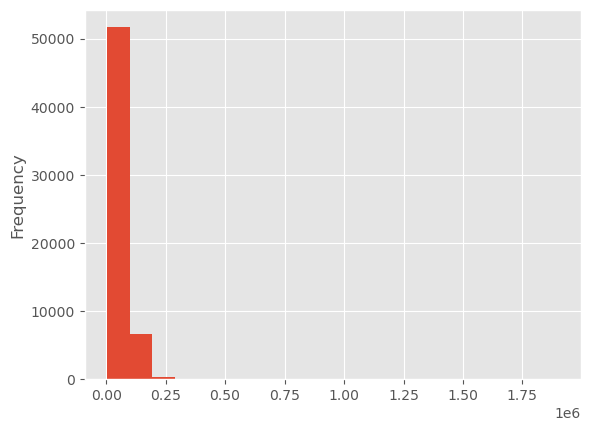

In [15]:
train_dataset['person_income'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Density'>

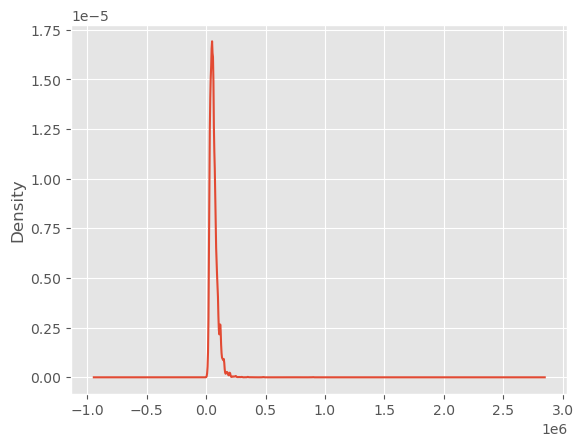

In [16]:
train_dataset['person_income'].plot(kind='kde')

In [17]:
import seaborn as sns

In [18]:
train_dataset.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [19]:
%matplotlib inline

In [20]:
train_dataset['person_income'].mean()


64046.17287066246

In [21]:
train_dataset['person_age'].mean()


27.550856850541393

In [22]:
highest_income = train_dataset[train_dataset['person_income'] == train_dataset['person_income'].max()]

<AxesSubplot:xlabel='id'>

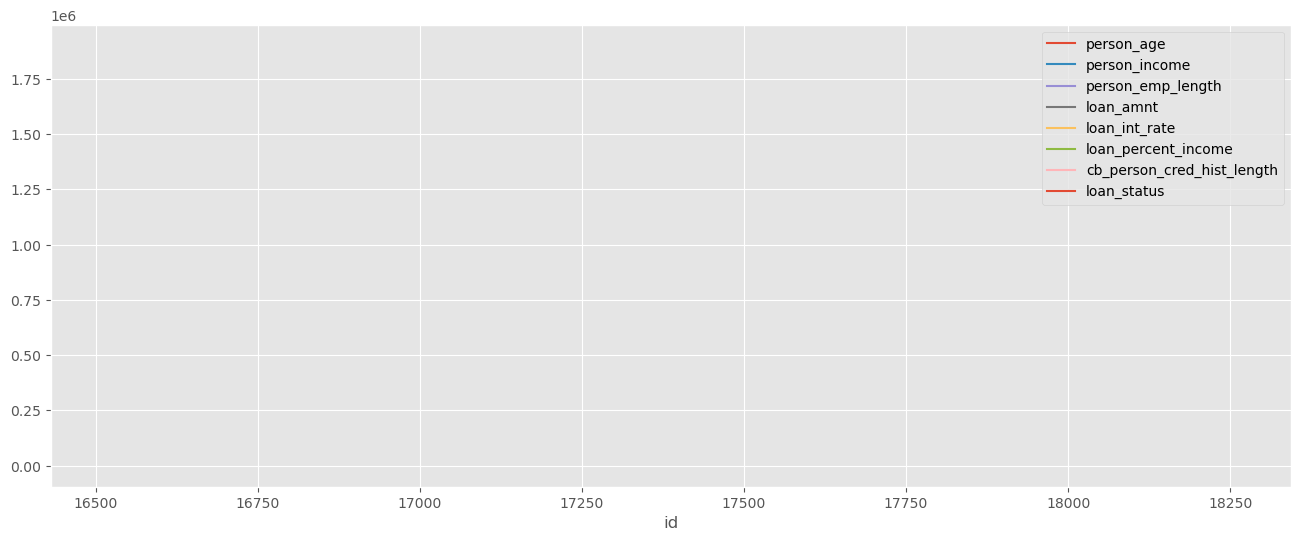

In [23]:
highest_income.plot(figsize=(16, 6))


In [24]:
dataset_corr = train_dataset[['person_income', 'loan_status']].corr()

In [25]:
dataset_corr

,person_income,loan_status
person_income,1.000000,-0.169956
loan_status,-0.169956,1.000000


<AxesSubplot:>

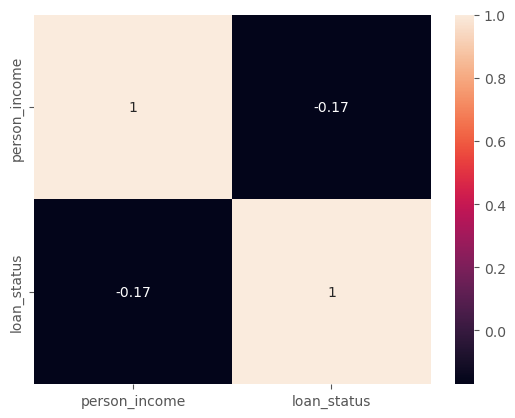

In [26]:
sns.heatmap(dataset_corr, annot=True)

#### Check Outliers

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>],
       [<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_percent_income'}>],
       [<AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:title={'center':'loan_status'}>, <AxesSubplot:>]],
      dtype=object)

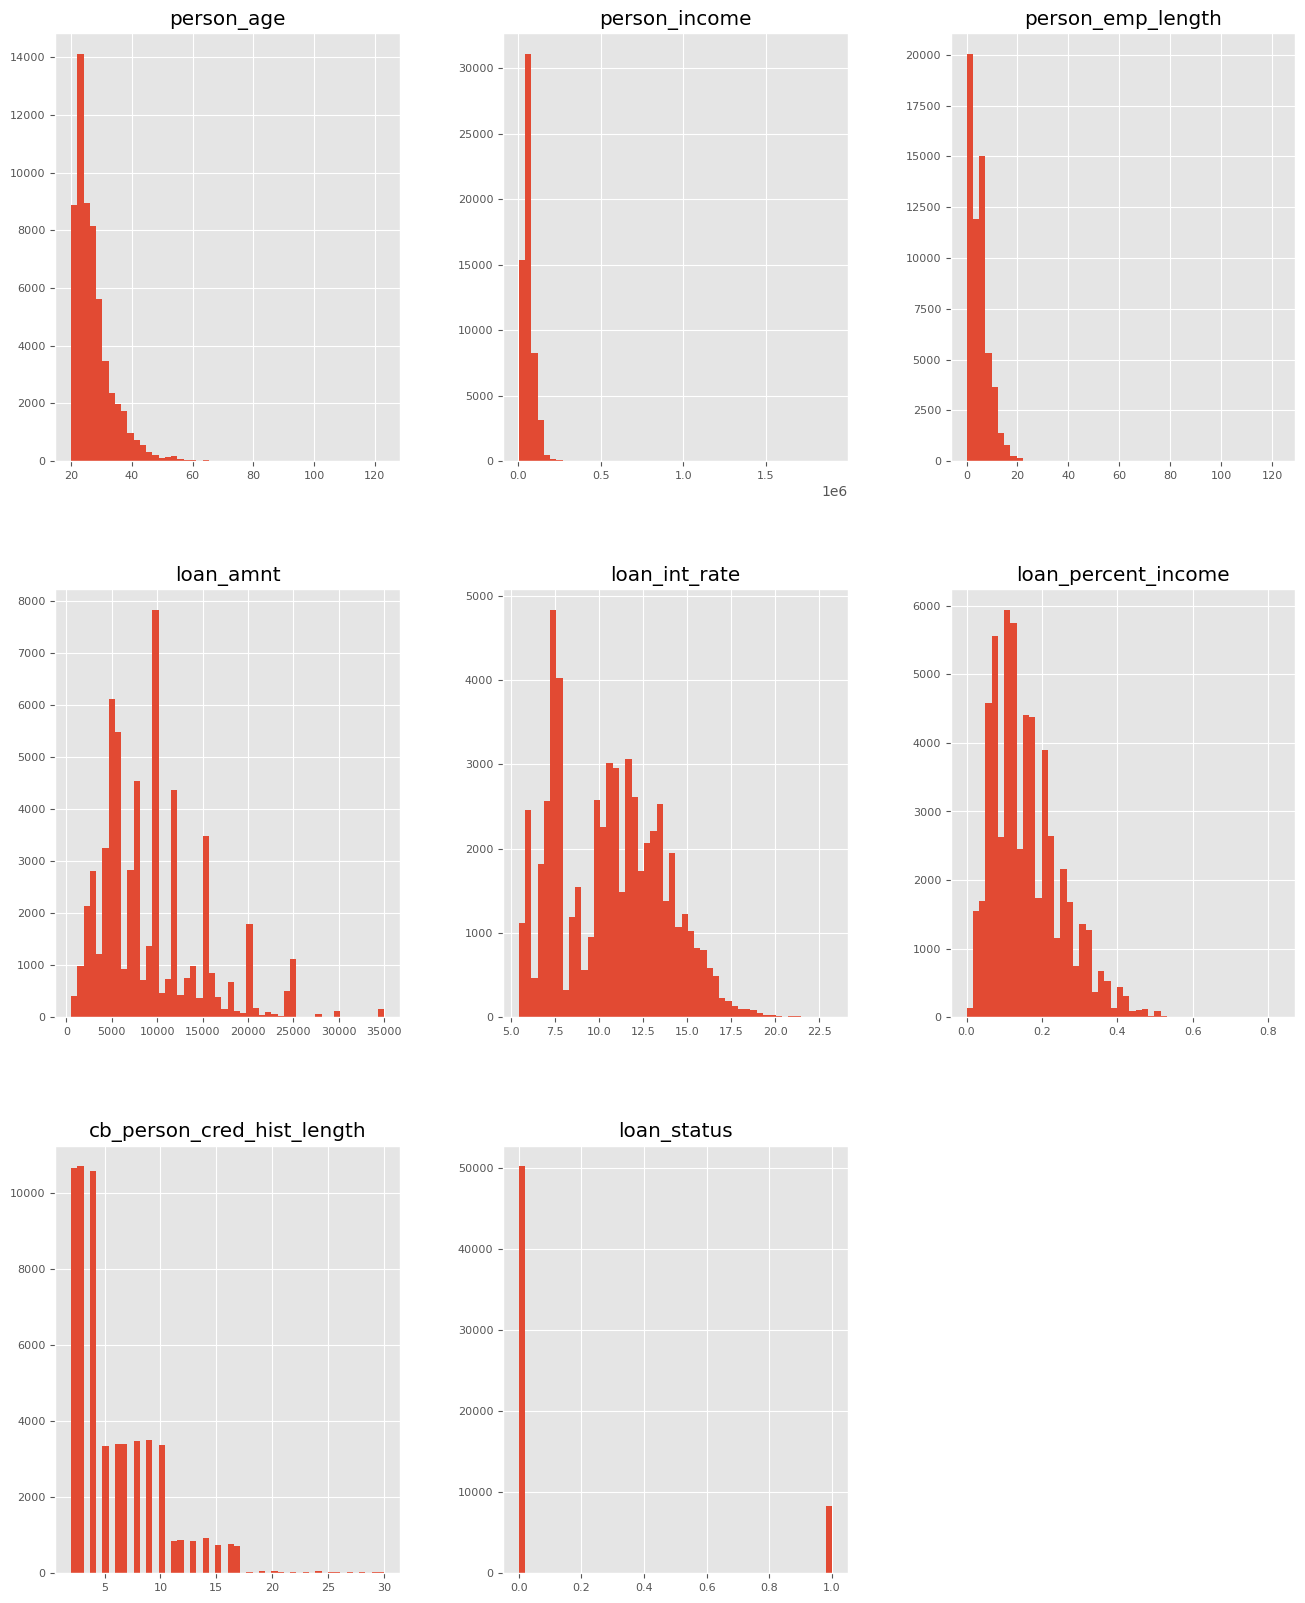

In [27]:
train_dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [29]:
temp = train_dataset[train_dataset['person_income'] < 15000]

<AxesSubplot:xlabel='person_income', ylabel='loan_status'>

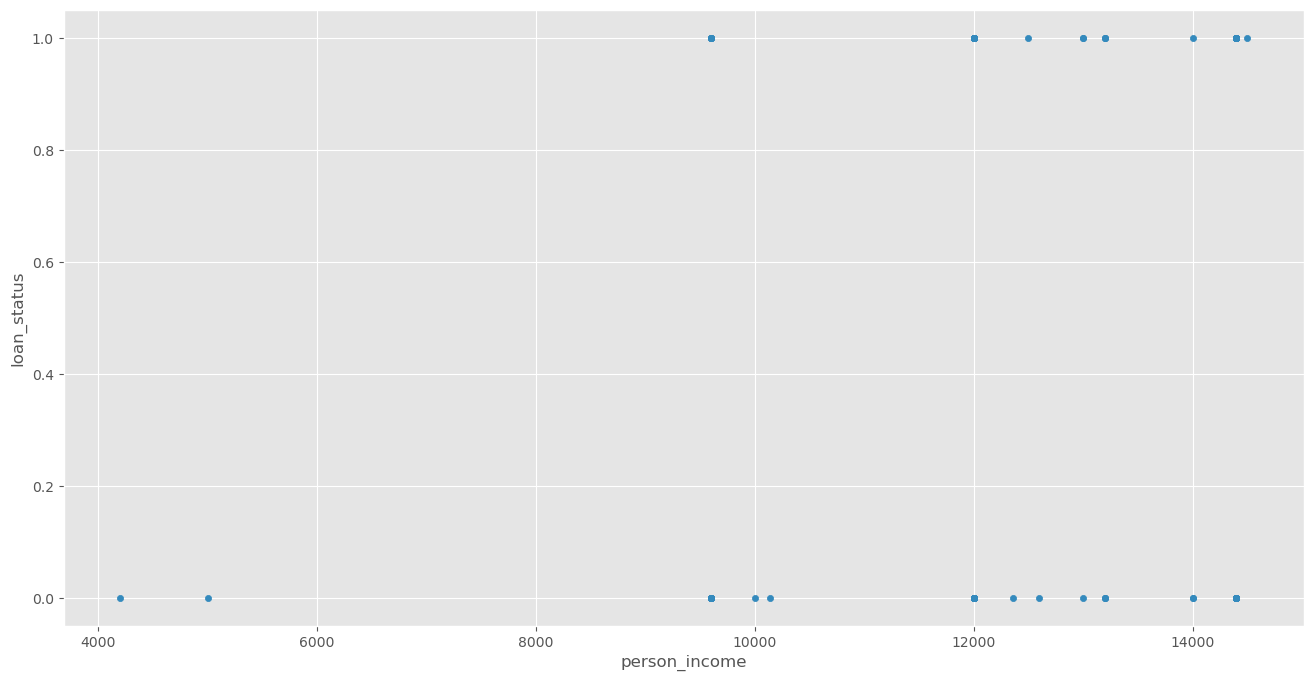

In [31]:
temp[['person_income', 'loan_status']].plot(kind='scatter', x='person_income', y='loan_status', figsize=(16, 8))

In [33]:
num_cols = train_dataset.select_dtypes(include=['float64', 'int64']).columns

In [34]:
max_threshold = []
min_threshold = []
for i in range(len(num_cols)):
    max_threshold.append(train_dataset[num_cols[i]].quantile(0.95))
    min_threshold.append(train_dataset[num_cols[i]].quantile(0.05))

In [35]:
for i in range(len(num_cols)):
    print(num_cols[i], ": max_threshold =  " , max_threshold[i], " and min_threshold = ", min_threshold[i])

person_age : max_threshold =   39.0  and min_threshold =  22.0
person_income : max_threshold =   120000.0  and min_threshold =  28800.0
person_emp_length : max_threshold =   12.0  and min_threshold =  0.0
loan_amnt : max_threshold =   20000.0  and min_threshold =  2500.0
loan_int_rate : max_threshold =   15.7  and min_threshold =  6.03
loan_percent_income : max_threshold =   0.33  and min_threshold =  0.04
cb_person_cred_hist_length : max_threshold =   14.0  and min_threshold =  2.0
loan_status : max_threshold =   1.0  and min_threshold =  0.0


## Data Cleaning


In [36]:
cat_cols = train_dataset.select_dtypes(include=['object']).columns

In [37]:
cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [38]:
train_dataset['person_home_ownership'].nunique()

4

In [39]:
train_dataset['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [40]:
train_dataset['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [41]:
train_dataset['loan_grade'].unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [42]:
train_dataset['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
for i in range(len(cat_cols)):
    train_dataset[cat_cols[i]]= le.fit_transform(train_dataset[cat_cols[i]]) 

In [46]:
for i in range(len(cat_cols)):
    test_dataset[cat_cols[i]]= le.fit_transform(test_dataset[cat_cols[i]]) 

In [47]:
for i in range(len(cat_cols)):
    print(train_dataset[cat_cols[i]].unique())

[3 2 0 1]
[1 3 4 5 0 2]
[1 2 0 3 4 5 6]
[0 1]


In [48]:
for i in range(len(cat_cols)):
    print(test_dataset[cat_cols[i]].unique())

[3 0 2 1]
[2 4 5 0 1 3]
[5 2 4 0 3 1 6]
[0 1]


In [49]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [51]:
y = train_dataset['loan_status']
X = train_dataset.drop('loan_status', axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### Apply XGBoost

In [54]:
model = XGBClassifier(eval_metric='logloss')

In [56]:
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"XGBOOST ROC AUC Score: {roc_auc:.4f}")

XGBOOST ROC AUC Score: 0.9529


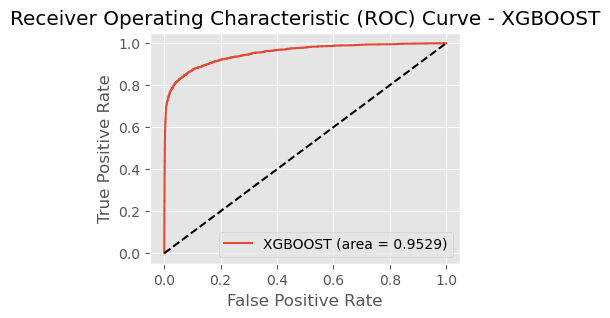

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f'XGBOOST (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve - XGBOOST')
plt.legend(loc='lower right')
plt.show()

In [62]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f'------------XGBOOSTClassifier')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

------------XGBOOSTClassifier
Cross-validation scores: [0.95163869 0.95344628 0.95221201 0.95852703 0.95298261]
Mean cross-validation score: 0.9537613231633959


In [63]:
test_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
id,,,,,,,,,,,
58645,23,69000,3,3.0,2,5,25000,15.76,0.36,0,2
58646,26,96000,0,6.0,4,2,10000,12.68,0.10,1,4
58647,26,30000,3,5.0,5,4,4000,17.19,0.13,1,2
58648,33,50000,3,4.0,0,0,7000,8.90,0.14,0,7
58649,26,102000,0,8.0,2,3,15000,16.32,0.15,1,4


In [64]:
sample = pd.read_csv('dataset/sample_submission.csv')

model = XGBClassifier(verbose=-1).fit(X, y)

sample['loan_status'] = model.predict_proba(test_dataset)[:,1]

sample.to_csv('dataset/submission.csv', index=False)

### Apply LightGBM 

In [65]:
from lightgbm import LGBMClassifier

In [66]:
model = LGBMClassifier(verbose=-1)

In [67]:
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"LightGBM ROC AUC Score: {roc_auc:.4f}")

LightGBM ROC AUC Score: 0.9552


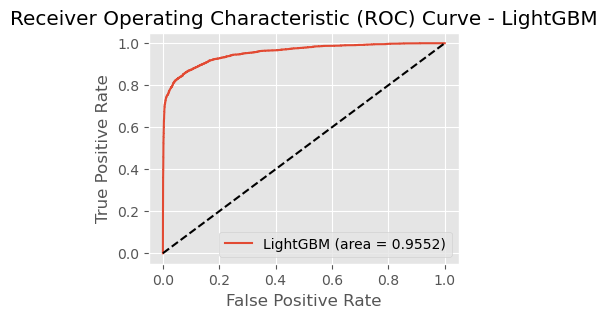

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f'LightGBM (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve - LightGBM')
plt.legend(loc='lower right')
plt.show()

In [71]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f'------------LightGBMClassifier')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

------------LightGBMClassifier
Cross-validation scores: [0.95513307 0.95564398 0.95527469 0.95941079 0.9561912 ]
Mean cross-validation score: 0.9563307444163268


In [72]:
sample = pd.read_csv('dataset/sample_submission.csv')

model = LGBMClassifier(verbose=-1).fit(X, y)

sample['loan_status'] = model.predict_proba(test_dataset)[:,1]

sample.to_csv('dataset/submission_2.csv', index=False)